**Data Science for Decision Support**


**Author:** Raniyaharini Rajendran


---




# Problem: **Calssification** 

# **`Task 1 „Data Pre-processing“ `**

1)	Read the data from your individual variant into Python notebook

In [65]:
#Write your code here 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics,svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import time
import random

In [3]:
#add more cell if needed to each code cell
heart_df = pd.read_csv('heart.csv')

2) Output the main information (number of variables, number of instances). 

In [4]:
#Write your code here 
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


*Comment the results of the previous program*
<n>We can observe 5 categorical colums (Sex, ChestpainType, RestingECG, ExerciseAngina and ST_Slope)
The rest of the columns are numerical

3) Output some first rows of the dataset. 


In [6]:
#Write your code here 
heart_df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


4) Make explanatory data analyses for each variable (mean, std, etc.).

In [7]:
#Write your code here 
heart_df.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


*Comment the results of the previous program* 



5) Look at independent and dependent variables. Divide the dataset accordingly into matrices X and Y. Output the shapes of these matrices. 

In [8]:
#Write your code here 
X = heart_df.iloc[:,0:11]
y = heart_df.HeartDisease

In [9]:
X.shape

(918, 11)

In [10]:
y.shape

(918,)

*Comment the results of the previous program* 

*   The dataset contains 918 observations and 12 attributes



6) Look at data types of the variables. Are there any categorical variable you need to encode? Execute necessary transformations. Drop some columns if necessary, when recommended in your individual variant.

In [11]:
#Write your code here 
heart_df['Sex'] = np.where(heart_df['Sex'] == "F", 0, 1)
heart_df['ExerciseAngina'] = np.where(heart_df['ExerciseAngina'] == "N", 0, 1)

In [12]:
heart_df.drop(heart_df[heart_df.RestingBP<50].index,axis=0,inplace=True)

7) Are there any Nan values? Try different filling of them (mean, median).

In [13]:
#Write your code here 
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

*Comment the results of the previous program* 

8) Check the dependences between each of the independent variable and the target variable and among the independent variables.  Output correlation table and corresponding headmap results.

In [14]:
#Write your code here 
#correlation table
heart_df.corr()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
Age,1.000000,0.055670,0.263084,-0.095142,0.198170,-0.382280,0.216017,0.258563,0.282012
Sex,0.055670,1.000000,0.009427,-0.199458,0.120424,-0.189668,0.191226,0.105444,0.305118
RestingBP,0.263084,0.009427,1.000000,0.089392,0.067823,-0.109693,0.153064,0.174252,0.117990
Cholesterol,-0.095142,-0.199458,0.089392,1.000000,-0.262585,0.237705,-0.035877,0.051390,-0.231479
FastingBS,0.198170,0.120424,0.067823,-0.262585,1.000000,-0.131067,0.059988,0.053062,0.267994
MaxHR,-0.382280,-0.189668,-0.109693,0.237705,-0.131067,1.000000,-0.370023,-0.161213,-0.401410
ExerciseAngina,0.216017,0.191226,0.153064,-0.035877,0.059988,-0.370023,1.000000,0.409494,0.495490
Oldpeak,0.258563,0.105444,0.174252,0.051390,0.053062,-0.161213,0.409494,1.000000,0.403638
HeartDisease,0.282012,0.305118,0.117990,-0.231479,0.267994,-0.401410,0.495490,0.403638,1.000000


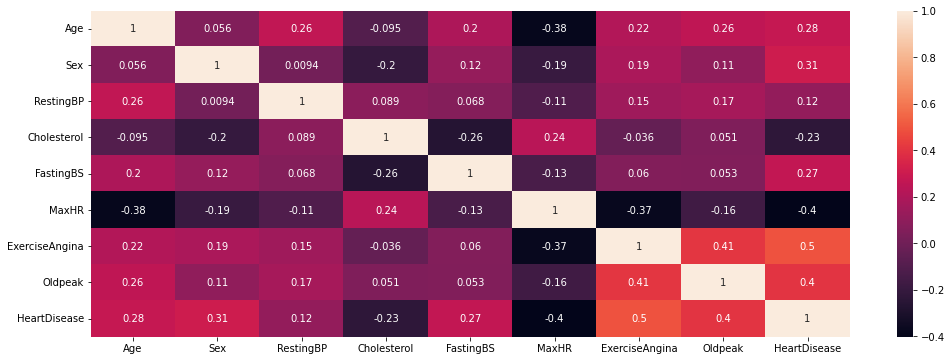

In [15]:
#Heatmap
plt.figure(figsize=(17,6))
sns.heatmap(heart_df.corr(),annot=True)

*Comment the results of the previous program* 

9) Build 2D plots of dependences between each pair of the variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ff88d6550>,
      dtype=object)

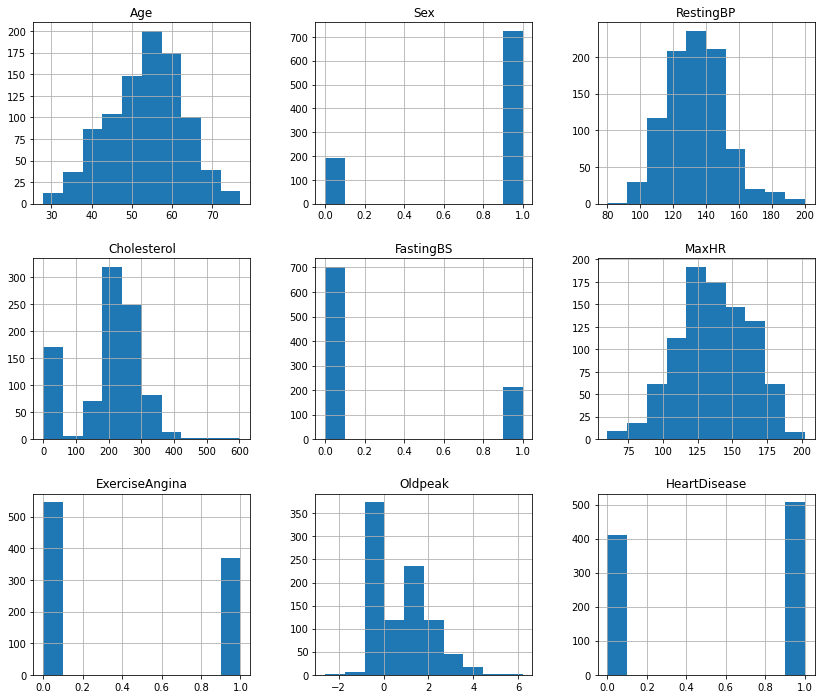

In [16]:
#Write your code here 
heart_df.hist(figsize = (14,12))

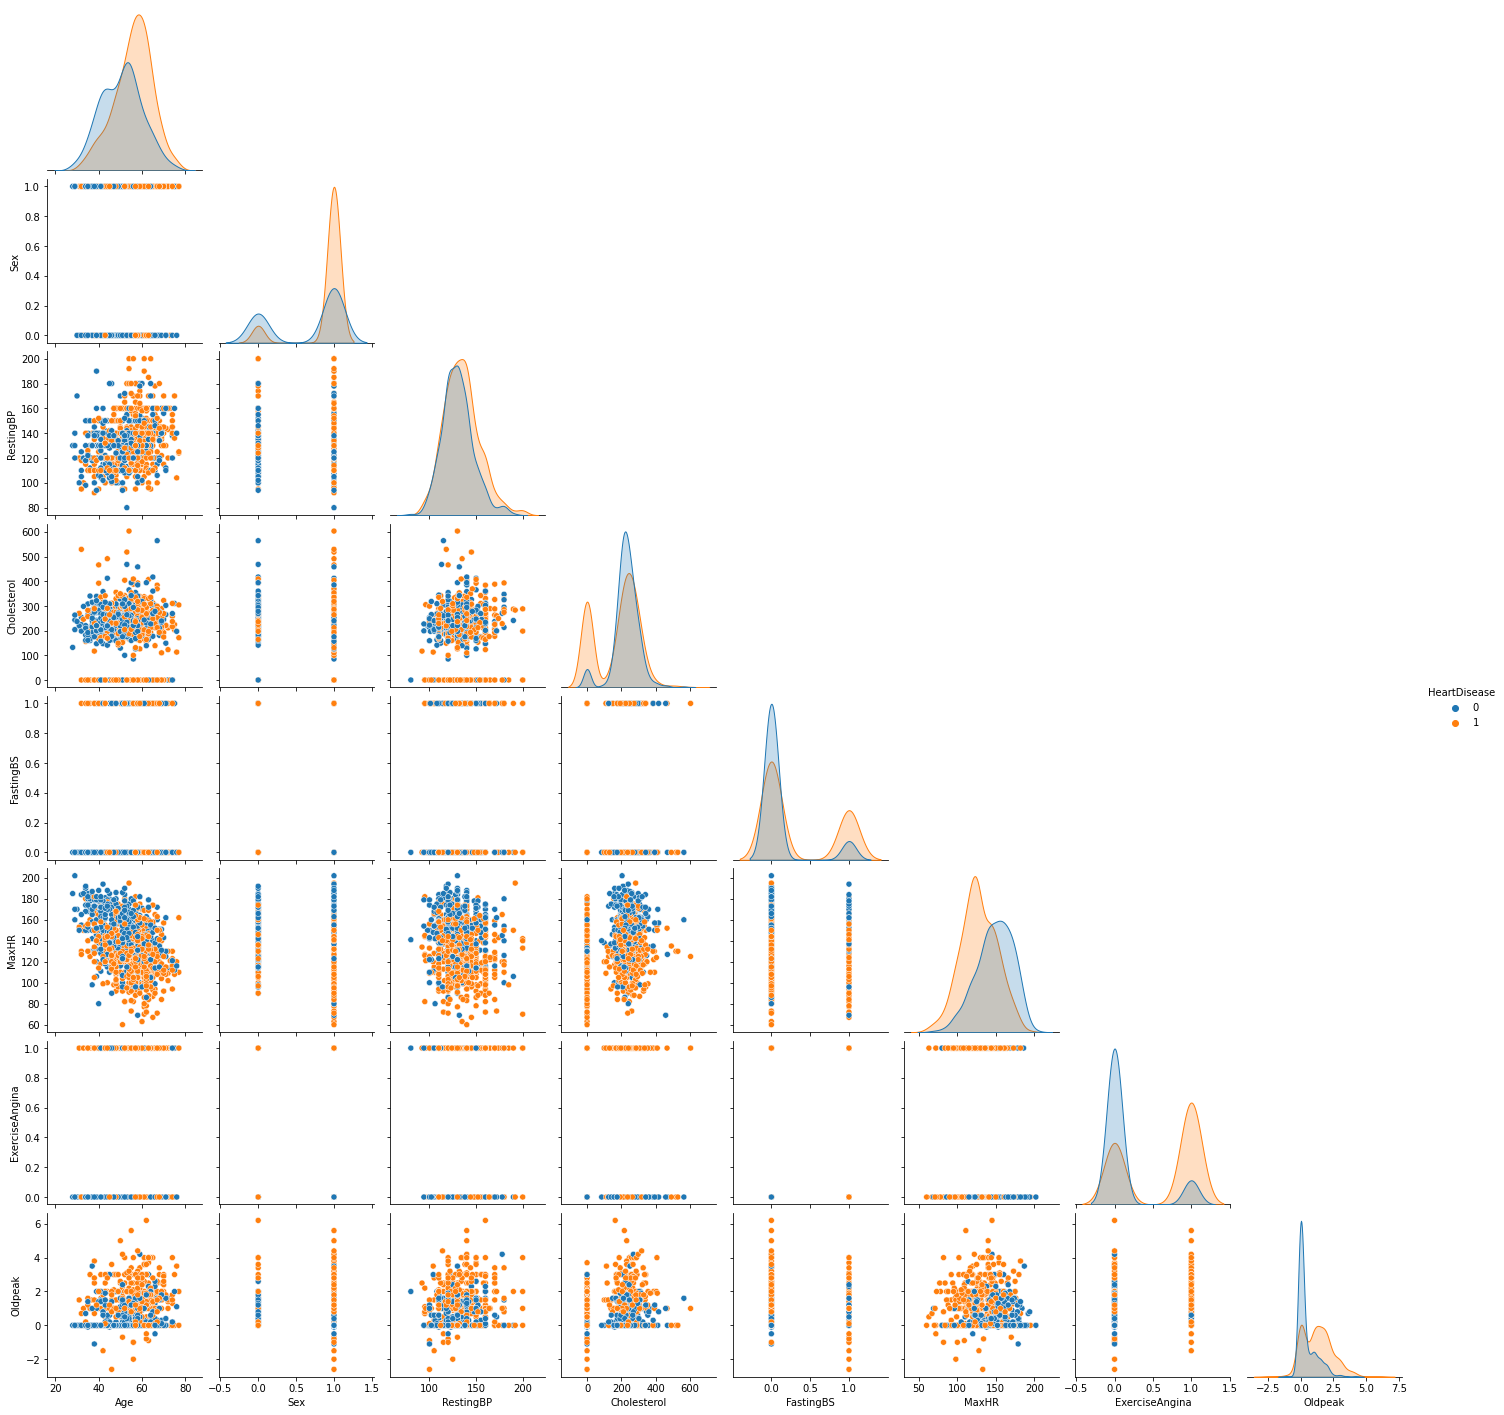

In [17]:
sns.pairplot(heart_df,hue='HeartDisease',corner=True)

# **`Task 2 “Data Analysis” `**

Compare 4 ML methods: 

*   Logistic regression
*   Decision tree classification
*   KNN: k nearest neighbours classification
*   Support vector machine (SVM) classification



1) Scale your whole dataset. Try different scalings for your dataset. (Standard Scaler, MinMax Scaler). Experiment with Standard Scaler first.

In [19]:
#Write your code here. 
heart_df = pd.get_dummies(heart_df)
X = heart_df.drop(["HeartDisease"], axis =1)
y = heart_df["HeartDisease"]

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state=42)
#Standard Scaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

2) Divide your dataset into 2 parts: training set and testing set (90:10). Use defined random_state to reproduce the splitting for other Scaler. Output the dimension of the resulting datasets.

In [20]:
#Write your code here 
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state=42)

3) **Preliminary analysis:** Build 4 models based on 4 mentioned ML methods. For each model: train with training set and output the confusion matrix of the model using training set. Calculate accuracy, precision, recall, F1 metrics over training set. Is precision or recall more important for description of your data? Build the ROC_AUC curve. Test your models with a testset and output the confusion matrix. Compare the same performance metrics calculated inside one model for training and testing sets.

**Linear logistic regression**

Linear Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.93      0.86      0.89        59

    accuracy                           0.87        92
   macro avg       0.86      0.87      0.86        92
weighted avg       0.88      0.87      0.87        92

Confusion Matrix
 [[29  4]
 [ 8 51]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


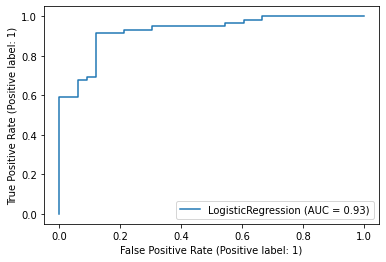

In [33]:
#Write your code here 
classifier1 = LogisticRegression()
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)

print("Linear Logistic Regression")
#accuracy, precision, recall, F1 metrics
print(classification_report(y_test, y_pred))

#Confusion Matrix
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier1,X_test, y_test) 
plt.show()
print('\n')

*Comment the results of the previous program*. *Compare the 
results of the same characteristics for training and test sets. Make conclusions.*

*   Good Precision and accuracy
*   However F1 score is comparitively lower



**Decision tree classification**

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        33
           1       0.87      0.81      0.84        59

    accuracy                           0.80        92
   macro avg       0.79      0.80      0.79        92
weighted avg       0.81      0.80      0.81        92

Confusion Matrix
 [[26  7]
 [11 48]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


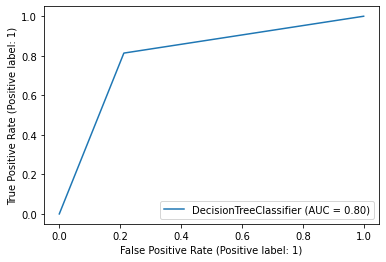

In [34]:
#Write your code here 
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)

print("DecisionTreeClassifier")
#accuracy, precision, recall, F1 metrics
print(classification_report(y_test, y_pred))

#Confusion Matrix
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier2,X_test, y_test) 
plt.show()
print('\n')

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

**kNN: k nearest neighbours classification**

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.93      0.88      0.90        59

    accuracy                           0.88        92
   macro avg       0.87      0.88      0.87        92
weighted avg       0.88      0.88      0.88        92

Confusion Matrix
 [[29  4]
 [ 7 52]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


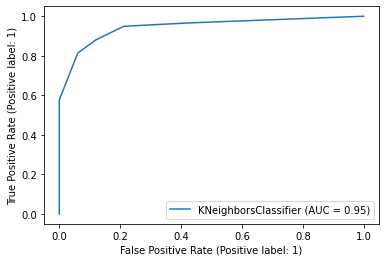

In [35]:
#Write your code here 
classifier3 = KNeighborsClassifier()
classifier3.fit(X_train, y_train)

y_pred = classifier3.predict(X_test)

print("KNeighborsClassifier")
#accuracy, precision, recall, F1 metrics
print(classification_report(y_test, y_pred))

#Confusion Matrix
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier3,X_test, y_test) 
plt.show()
print('\n')

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

**Support vector machine**

SVC
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.92      0.92      0.92        59

    accuracy                           0.89        92
   macro avg       0.88      0.88      0.88        92
weighted avg       0.89      0.89      0.89        92

Confusion Matrix
 [[28  5]
 [ 5 54]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


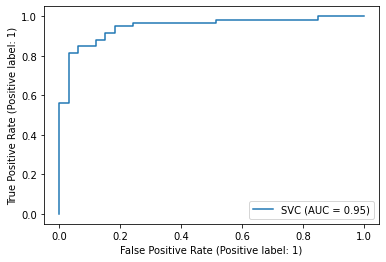

In [36]:
#Write your code here 
classifier4 = SVC()
classifier4.fit(X_train, y_train)

y_pred = classifier4.predict(X_test)

print("SVC")
#accuracy, precision, recall, F1 metrics
print(classification_report(y_test, y_pred))

#Confusion Matrix
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier4,X_test, y_test) 
plt.show()
print('\n')

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

4) Re-calculate the results of Task 2 (use the same random_state as for Standard Scaler by splitting) with MinMaxScaler and compare the results based on metric accuracy. Use the Scaler, which gives the best results for the next Tasks.

Model: Logistic Regression 


              precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.93      0.86      0.89        59

    accuracy                           0.87        92
   macro avg       0.86      0.87      0.86        92
weighted avg       0.88      0.87      0.87        92

Confusion Matrix
 [[29  4]
 [ 8 51]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


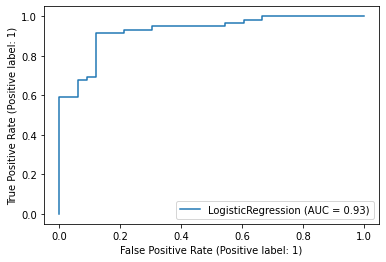




Model: Decision Tree 


              precision    recall  f1-score   support

           0       0.71      0.73      0.72        33
           1       0.84      0.83      0.84        59

    accuracy                           0.79        92
   macro avg       0.78      0.78      0.78        92
weighted avg       0.79      0.79      0.79        92

Confusion Matrix
 [[24  9]
 [10 49]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


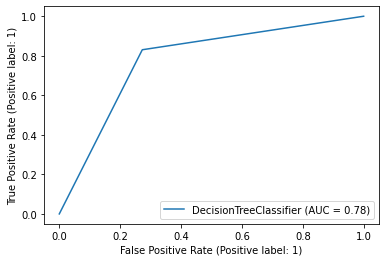




Model: KNN 


              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.93      0.88      0.90        59

    accuracy                           0.88        92
   macro avg       0.87      0.88      0.87        92
weighted avg       0.88      0.88      0.88        92

Confusion Matrix
 [[29  4]
 [ 7 52]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


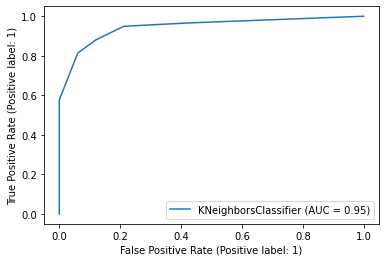




Model: SVC 


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.92      0.92      0.92        59

    accuracy                           0.89        92
   macro avg       0.88      0.88      0.88        92
weighted avg       0.89      0.89      0.89        92

Confusion Matrix
 [[28  5]
 [ 5 54]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


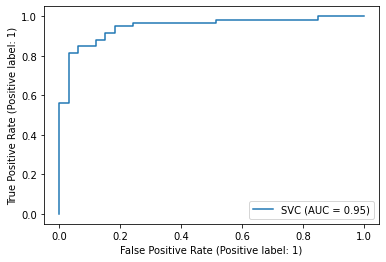

In [32]:
#Write your code here
#MinMax Scaler
X_train1 = MinMaxScaler().fit_transform(X_train)
X_test1 = MinMaxScaler().fit_transform(X_test)

#Declaring different models
model_name = [
    'Logistic Regression',
    'Decision Tree',
    'KNN',
    'SVC'
]

models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    SVC()
]

#Classification report and ROC
def model_train_report(model,X_train1, X_test1, y_train, y_test):
    model = model.fit(X_train1,y_train)
    y_pred = model.predict(X_test1)
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))
    #AUC plot and ROC curve
    print('-----AUC Plot and ROC Curve-----')
    metrics.plot_roc_curve(model,X_test1, y_test) 
    plt.show()
    print('\n')

for name,model in zip(model_name,models):
    print(f'Model: {name} \n\n')
    model_train_report(model,X_train1, X_test1, y_train, y_test)
    print()

*Comment the results of the previous program.*

# **`Task 3 “Cross validation” `**

1)	Make 5 fold cross validation, dividing your combined (training + validation sets) into 5 folds in different combinations manually with the function train_test_split() and  without using such functions as: cross_val_score(), cross_validation(), GridSearchCV(). Execute a cycle for each fold running all four models inside.

2) Find the average values for each metric for each model based on the validation set. 

3) Try different values for the hyperparameters (see corresponding lecture slides) for each model and re-run the steps 1-2. Make conclusions about the best model and best parameters, based on each metrics and based on the majority of the metrics. 



In [37]:
#Write your code here
scores = []
def model_train_report(model,X_train, X_test, y_train, y_test):
    train_test = KFold(n_splits=5, random_state=None)
    # Manually performing cross validation
    for train_index, test_index in train_test.split(X,y): 
        print("Train:\n", train_index)
        print("\n")
        print("Validation:\n", test_index) 
        X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        score= model.score(X_train, y_train)
        scores.append(score)
    print('\n\nCross-Validation accuracy mean and Standard deviation: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
        
for name,model in zip(model_name,models):
    print(f'Model: {name} \n\n')
    model_train_report(model,X_train, X_test, y_train, y_test)
    print()

Model: Logistic Regression 


Train:
 [184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309
 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345
 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363
 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381
 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399
 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417
 418 419 420 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lo



Cross-Validation accuracy mean: 0.498 +/- 0.065

Model: KNN 


Train:
 [184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309
 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345
 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363
 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381
 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399
 400 401 402 403 404 405 406 407 408 409 410 411 41

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Train:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 24

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Train:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 24

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"



Train:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [40]:
#Logistic Regression Hyperparameter tuning
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [1000,2000,3000]
    }
]
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X,y)
best_clf.best_params_

In [50]:
#Hyper parameter tuning for Decision tree
param_ = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,15),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

print('-----Best Parameters-----')
grid1 = GridSearchCV(DecisionTreeClassifier(),param_grid=param_, cv=5, verbose=1, n_jobs=-1)
g_results1 = grid1.fit(X_train, y_train)
print('-----Best Parameters-----')
print("Best Score: " , g_results1.best_score_)
print("Best Params: " , g_results1.best_params_)

-----Best Parameters-----
Fitting 5 folds for each of 1008 candidates, totalling 5040 fits
-----Best Parameters-----
Best Score:  0.833939393939394
Best Params:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
560 fits failed out of a total of 5040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
560 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

In [44]:
# Hyper parameter tuning for Kneighbors classifier
grid_params = {
    'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23],
    'p': (1,2),
    'weights':['uniform', 'distance'],
    'metric':['euclidean','manhattan', 'minkowski']
}
g = GridSearchCV(KNeighborsClassifier(algorithm='auto'), 
    grid_params,
    verbose=1,
    cv=3,
    n_jobs=-1
)
print('-----Best Parameters-----')
g_results = g.fit(X_train, y_train)
print("Best Score: " , g_results.best_score_)
print("Best Estimator: " , g_results.best_estimator_)
print("Best Params: " , g_results.best_params_)

-----Best Parameters-----
Fitting 3 folds for each of 132 candidates, totalling 396 fits
Best Score:  0.8557575757575758
Best Estimator:  KNeighborsClassifier(metric='manhattan', n_neighbors=21, p=1)
Best Params:  {'metric': 'manhattan', 'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}


In [47]:
#Hyperparameter tuning for SVM
svm = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm,param_grid)
g_results = grid.fit(X_train,y_train)
print("Best Estimator: " , g_results.best_estimator_)
print("Best Params: " , g_results.best_params_)

Best Estimator:  SVC(C=1000, gamma=0.01)
Best Params:  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


*Show the results of 3 runs of each model with different hyperparameters each.*

4)	**Final evaluation.** Evaluate your model using a test set (remains the same from the previous task) based on all metrics. Take the best hyperparameters of the models from the cross validation step and train the model with the complete training set (training set + validation set). Compare the results obtained on the validation set. Make the conclusions about the results.

Model: Logistic Regression 


              precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.93      0.86      0.89        59

    accuracy                           0.87        92
   macro avg       0.86      0.87      0.86        92
weighted avg       0.88      0.87      0.87        92

Confusion Matrix
 [[29  4]
 [ 8 51]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


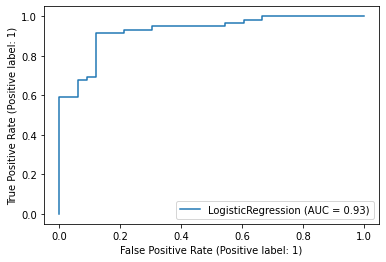




Model: KNN 


              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.93      0.90      0.91        59

    accuracy                           0.89        92
   macro avg       0.88      0.89      0.88        92
weighted avg       0.89      0.89      0.89        92

Confusion Matrix
 [[29  4]
 [ 6 53]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


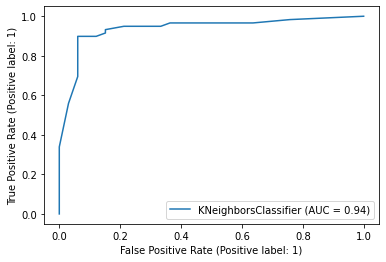




Model: Decision Tree 


              precision    recall  f1-score   support

           0       0.72      0.85      0.78        33
           1       0.91      0.81      0.86        59

    accuracy                           0.83        92
   macro avg       0.81      0.83      0.82        92
weighted avg       0.84      0.83      0.83        92

Confusion Matrix
 [[28  5]
 [11 48]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


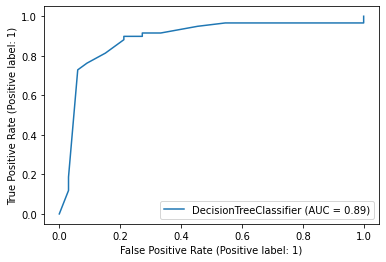




Model: SVC 


              precision    recall  f1-score   support

           0       0.80      0.85      0.82        33
           1       0.91      0.88      0.90        59

    accuracy                           0.87        92
   macro avg       0.86      0.86      0.86        92
weighted avg       0.87      0.87      0.87        92

Confusion Matrix
 [[28  5]
 [ 7 52]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


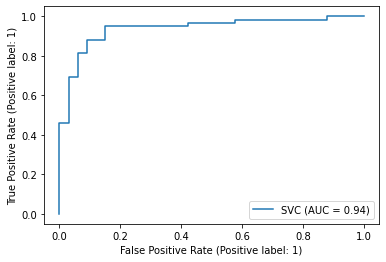

In [51]:
# Write your code here
model_name = [
    'Logistic Regression',
    'KNN',
    'Decision Tree',
    'SVC'
]
#Hyper-parameter tuning-1
models = [
    LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None),
    KNeighborsClassifier(metric= 'manhattan', n_neighbors= 21, p= 1, weights= 'uniform'),
    DecisionTreeClassifier(criterion='gini', max_depth= 5, min_samples_leaf= 1, min_samples_split= 2),
    SVC(C= 1000, gamma= 0.01, kernel= 'rbf')
]

def model_train_report(model,X_train, X_test, y_train, y_test):
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))
    print('-----AUC Plot and ROC Curve-----')
    metrics.plot_roc_curve(model,X_test, y_test) 
    plt.show()
    print('\n')


#Traverse all models to score.
for name,model in zip(model_name,models):
    print(f'Model: {name} \n\n')
    model_train_report(model,X_train, X_test, y_train, y_test)
    print()

# **`Task 4 “Use automatic cross validation ” `**

1) Use the functions cross_val_score() or cross_validation() for automation of the manually performed process in Task 3. Use the best hyperparameter values for each model found at the previous step.

In [52]:
#Write your code here for Logistic regression
classifier1 = LogisticRegression()
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)
#cross validation
print('-----Cross Validation-----')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_score = cross_val_score(classifier1, X_train, y_train,scoring = 'accuracy',cv = kfold)
print(cv_score)
print("Average:",cv_score.mean())
print('\n')

-----Cross Validation-----
[0.88484848 0.87878788 0.84242424 0.83636364 0.83030303]
Average: 0.8545454545454545




In [53]:
#Write your code here for Decision tree classification
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)
#cross validation
print('-----Cross Validation-----')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_score = cross_val_score(classifier2, X_train, y_train,scoring = 'accuracy',cv = kfold)
print(cv_score)
print("Average:",cv_score.mean())
print('\n')

-----Cross Validation-----
[0.78181818 0.83030303 0.77575758 0.81818182 0.82424242]
Average: 0.8060606060606063




In [54]:
#Write your code here for #kNN: k nearest neighbours classification
classifier3 = KNeighborsClassifier()
classifier3.fit(X_train, y_train)

y_pred = classifier3.predict(X_test)
#cross validation
print('-----Cross Validation-----')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_score = cross_val_score(classifier3, X_train, y_train,scoring = 'accuracy',cv = kfold)
print(cv_score)
print("Average:",cv_score.mean())
print('\n')

-----Cross Validation-----
[0.85454545 0.86666667 0.84242424 0.81818182 0.82424242]
Average: 0.8412121212121212




In [55]:
#Support vector machine classification
classifier4 = SVC()
classifier4.fit(X_train, y_train)

y_pred = classifier4.predict(X_test)
#cross validation
print('-----Cross Validation-----')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_score = cross_val_score(classifier4, X_train, y_train,scoring = 'accuracy',cv = kfold)
print(cv_score)
print("Average:",cv_score.mean())
print('\n')

-----Cross Validation-----
[0.88484848 0.86060606 0.84242424 0.83030303 0.81818182]
Average: 0.8472727272727273




*!! Comment the obtained results here !!*

2) Use the function GridSearchCV() to find the best hyperparameters for each ML method.

In [ ]:
#Write your code here for Logistic regression
#Logistic Regression Hyperparameter tuning
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [1000,2000,3000]
    }
]
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X,y)
best_clf.best_params_

In [ ]:
#Write your code here for Decision tree classification
#Hyper parameter tuning for Decision tree
param_ = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,15),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

print('-----Best Parameters-----')
grid1 = GridSearchCV(DecisionTreeClassifier(),param_grid=param_, cv=5, verbose=1, n_jobs=-1)
g_results1 = grid1.fit(X_train, y_train)
print('-----Best Parameters-----')
print("Best Score: " , g_results1.best_score_)
print("Best Params: " , g_results1.best_params_)

In [ ]:
#Write your code here for #kNN: k nearest neighbours classification
# Hyper parameter tuning for Kneighbors classifier
grid_params = {
    'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23],
    'p': (1,2),
    'weights':['uniform', 'distance'],
    'metric':['euclidean','manhattan', 'minkowski']
}
g = GridSearchCV(KNeighborsClassifier(algorithm='auto'), 
    grid_params,
    verbose=1,
    cv=3,
    n_jobs=-1
)
print('-----Best Parameters-----')
g_results = g.fit(X_train, y_train)
print("Best Score: " , g_results.best_score_)
print("Best Estimator: " , g_results.best_estimator_)
print("Best Params: " , g_results.best_params_)

In [ ]:
#Write your code here for Support vector machine classification
#Hyperparameter tuning for SVM
svm = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm,param_grid)
g_results = grid.fit(X_train,y_train)
print("Best Estimator: " , g_results.best_estimator_)
print("Best Params: " , g_results.best_params_)

*!! Comment the obtained results here !!*

3) Evaluate the found models and parameters with the test dataset. Compare the results of Tasks 3 and Task4. Make conclusion about the results.

In [58]:
#Write your code here Logistic regression
classifier1 = LogisticRegression()
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Test set evaluation:
_____________________________________
Mean Absolute Error: 0.13043478260869565
Mean Squared Error: 0.13043478260869565
Root Mean Squared Error: 0.3611575592573076


In [59]:
#Write your code here for Decision tree classification
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Test set evaluation:
_____________________________________
Mean Absolute Error: 0.22826086956521738
Mean Squared Error: 0.22826086956521738
Root Mean Squared Error: 0.47776654295295456


In [60]:
#Write your code here for #kNN: k nearest neighbours classification
classifier3 = KNeighborsClassifier()
classifier3.fit(X_train, y_train)

y_pred = classifier3.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test set evaluation:
_____________________________________
Mean Absolute Error: 0.11956521739130435
Mean Squared Error: 0.11956521739130435
Root Mean Squared Error: 0.3457820374040623


In [61]:
#Write your code here for Support vector machine classification
classifier4 = SVC()
classifier4.fit(X_train, y_train)

y_pred = classifier4.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test set evaluation:
_____________________________________
Mean Absolute Error: 0.10869565217391304
Mean Squared Error: 0.10869565217391304
Root Mean Squared Error: 0.3296902366978935


*!! Comment the obtained results here !!*

4) Output residuals/outliers (wrongly classified observations) for each model. Are there any observation, which were wrongly classified by all models?  

In [68]:
#Write your code here to output the outliers for all four models as a DataFrame.
#Handling Outlier of the features that are having normal distribution
num_cols = [col for col in X.columns if X[col].dtype != "object"]
cat_cols = [col for col in X.columns if col not in num_cols]

normal_cols = ["Age","MaxHR","RestingBP"]
for col in normal_cols:
    mean = np.mean(heart_df[col])
    std = np.std(heart_df[col])
    lower_range = mean - (3*std)
    upper_range = mean + (3*std)
    heart_df[col] = np.where(((heart_df[col] < lower_range) | (heart_df[col] > upper_range)),random.randint(int(lower_range),int(upper_range)),heart_df[col])

#Handling Ouliers from Cholestrol feature using the IQR meathod and replacing it by the random number between the lower_bound and the upper_bound
IQR = np.percentile(heart_df["Cholesterol"],75) - np.percentile(heart_df["Cholesterol"],25)
lower_bound = np.percentile(heart_df["Cholesterol"],25) - 1.5 * IQR
upper_bound = np.percentile(heart_df["Cholesterol"],75) + 1.5 * IQR
median_cholesterol = np.median(heart_df["Cholesterol"])

heart_df["Cholesterol"] = np.where(((heart_df["Cholesterol"] > upper_bound) | (heart_df["Cholesterol"] < lower_bound)) 
                                 ,random.randint(int(np.percentile(heart_df["Cholesterol"],25)),
                                                 int(np.percentile(heart_df["Cholesterol"],75))),heart_df["Cholesterol"])

5) Try to exclude these observations (1-3 observations) and rebuild the models. Compare the accuracy result before and after removing of outliers (use cross_validation() function) andrun all 4 models with the reduced dataset without outliers once more. 

LogisticRegression
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.93      0.86      0.89        59

    accuracy                           0.87        92
   macro avg       0.86      0.87      0.86        92
weighted avg       0.88      0.87      0.87        92

Confusion Matrix
 [[29  4]
 [ 8 51]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


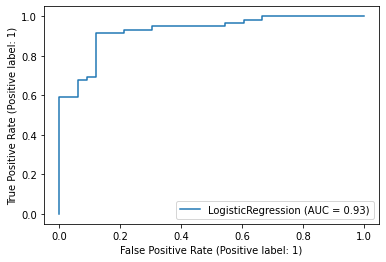

In [70]:
#Write your code here for #Logistic model after removing of outliers
classifier1 = LogisticRegression()
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)

print("LogisticRegression")
#accuracy, precision, recall, F1 metrics
print(classification_report(y_test, y_pred))

#Confusion Matrix
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier1,X_test, y_test) 
plt.show()
print('\n')

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.68      0.76      0.71        33
           1       0.85      0.80      0.82        59

    accuracy                           0.78        92
   macro avg       0.77      0.78      0.77        92
weighted avg       0.79      0.78      0.79        92

Confusion Matrix
 [[25  8]
 [12 47]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


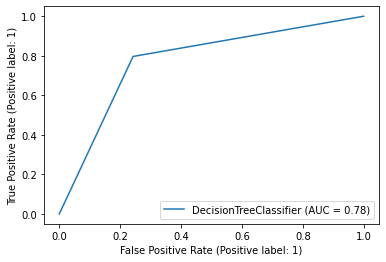

In [71]:
#Write your code here for Decision tree classification after removing of outliers
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)

print("DecisionTreeClassifier")
#accuracy, precision, recall, F1 metrics
print(classification_report(y_test, y_pred))

#Confusion Matrix
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier2,X_test, y_test) 
plt.show()
print('\n')

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.93      0.88      0.90        59

    accuracy                           0.88        92
   macro avg       0.87      0.88      0.87        92
weighted avg       0.88      0.88      0.88        92

Confusion Matrix
 [[29  4]
 [ 7 52]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


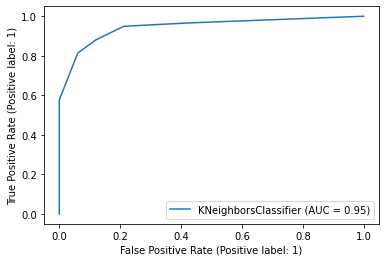

In [72]:
#Write your code here for kNN: k nearest neighbours classification after removing of outliers
classifier3 = KNeighborsClassifier()
classifier3.fit(X_train, y_train)

y_pred = classifier3.predict(X_test)

print("KNeighborsClassifier")
#accuracy, precision, recall, F1 metrics
print(classification_report(y_test, y_pred))

#Confusion Matrix
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier3,X_test, y_test) 
plt.show()
print('\n')

SVC
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.93      0.88      0.90        59

    accuracy                           0.88        92
   macro avg       0.87      0.88      0.87        92
weighted avg       0.88      0.88      0.88        92

Confusion Matrix
 [[29  4]
 [ 7 52]]
-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


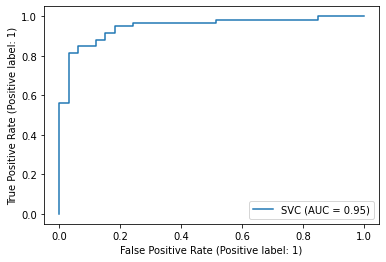

In [73]:
#Write your code here for Support vector machine classification after removing of outliers
classifier4 = SVC()
classifier4.fit(X_train, y_train)

y_pred = classifier3.predict(X_test)

print("SVC")
#accuracy, precision, recall, F1 metrics
print(classification_report(y_test, y_pred))

#Confusion Matrix
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier4,X_test, y_test) 
plt.show()
print('\n')

!! Make conclusions as a Text field !!

*   Significant improvement in accuracy is observed after the removal of outlier

